# Introduction aux réseaux de neurones convolutifs #2

In [73]:
import tensorflow as tf
import numpy as np

from keras.preprocessing import image_dataset_from_directory

# Fonction de normalisation pour les images
def normalize_img(image, label):
    # Normalisation des pixels entre 0 et 1
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Chargement des données avec séparation entre train et validation
train_data = image_dataset_from_directory(
    '../Data',
    validation_split=0.2,
    subset='training',
    seed=123,
    batch_size=32
)

test_data = image_dataset_from_directory(
    '../Data',
    validation_split=0.2,
    subset='validation',
    seed=123,
    batch_size=32
)

# Appliquer la normalisation aux datasets
train_data = train_data.map(normalize_img)
test_data = test_data.map(normalize_img)

# Conversion en Numpy arrays
X_train = []
y_train = []
for images, labels in train_data:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

X_test = []
y_test = []
for images, labels in test_data:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)


Found 101 files belonging to 2 classes.
Using 81 files for training.
Found 101 files belonging to 2 classes.
Using 20 files for validation.
X_train shape: (81, 256, 256, 3), y_train shape: (81,)
X_test shape: (20, 256, 256, 3), y_test shape: (20,)


In [74]:
X_train.shape

(81, 256, 256, 3)

In [81]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import layers, models
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [82]:
#Architechture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(256,256, 3))) 
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(layers.Dropout(0.05)) #never put it last 
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/melanie.benyadi@Digital-Grenoble.local/anaconda3/envs/ML5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │     2,621,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,687,424 (10.25 MB)

 Trainable params: 2,687,232 (10.25 MB)

 Non-trainable params: 192 (768.00 B)

In [85]:
#train the model 
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8333 - loss: 0.3026 - val_accuracy: 0.5556 - val_loss: 2.1896
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7917 - loss: 0.3240 - val_accuracy: 0.5556 - val_loss: 1.6084
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.8194 - loss: 0.2827 - val_accuracy: 0.5556 - val_loss: 0.9381
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8194 - loss: 0.2782 - val_accuracy: 0.5556 - val_loss: 0.7185
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8056 - loss: 0.2794 - val_accuracy: 0.5556 - val_loss: 0.5765
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8056 - loss: 0.3568 - val_accuracy: 0.4444 - val_loss: 0.6001
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8056 - loss: 0.3194 - val_accuracy: 0.3333 - val_loss: 0.7954
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8194 - loss: 0.4831 - val_accuracy: 0.4444 - val_loss: 1.0254
Epoch 9

In [79]:
#evaluate test data
_, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.8000 - loss: 0.6904
0.800000011920929


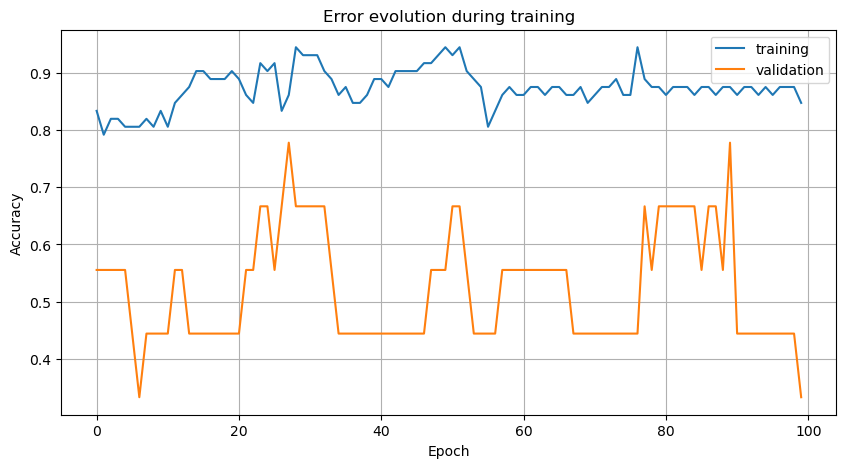

In [86]:
# visualize training and validation accuracies
import matplotlib.pyplot as plt

# Visualization of error evolution
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"],label = "training" )
plt.plot(history.history["val_accuracy"],label = "validation" )
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Error evolution during training')
plt.legend()
plt.show()

Augmentation du jeu de donnée


In [92]:
#Using pretraiting layers
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
#Architechture
model1 = Sequential()
model1.add(data_augmentation)
model1.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(256,256, 3))) 
model1.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) 
model1.add(MaxPooling2D(pool_size=2))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) 
model1.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) 
model1.add(MaxPooling2D(pool_size=2))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(layers.Dropout(0.05)) #never put it last 
model1.add(Dense(2, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/melanie.benyadi@Digital-Grenoble.local/anaconda3/envs/ML5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
#train the model 
history1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.1)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5000 - loss: 4.4831 - val_accuracy: 0.5556 - val_loss: 1.3007
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5972 - loss: 2.4140 - val_accuracy: 0.4444 - val_loss: 0.7683
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6528 - loss: 4.1931 - val_accuracy: 0.5556 - val_loss: 1.2203
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6528 - loss: 0.6459 - val_accuracy: 0.5556 - val_loss: 1.8964
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5139 - loss: 1.1861 - val_accuracy: 0.5556 - val_loss: 2.1217
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4722 - loss: 0.9842 - val_accuracy: 0.4444 - val_loss: 1.8578
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5417 - loss: 0.8101 - val_accuracy: 0.4444 - val_loss: 1.5404
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5278 - loss: 0.7086 - val_accuracy: 0.4444 - val_loss: 4.7572
Epoch 9